# Quality Control CTD data with PySeabird
### Author: Guilherme Castelão

This is a minimalist example on how to use the Python Seabird package to read and apply a quality control in a CTD output file. For more details, please check the [documentation](https://seabird.readthedocs.io/en/latest/).

### Requirements

This notebook requires the packages seabird, supportdata, and cotede. You can install those using pip as following:

```shell
pip install seabird[QC]
```

In [1]:
#%matplotlib inline

from seabird.cnv import fCNV
from seabird.qc import fProfileQC

Let's first download an example file with some CTD data

In [2]:
!wget https://raw.githubusercontent.com/castelao/seabird/master/sampledata/CTD/dPIRX003.cnv

--2019-08-29 21:17:27--  https://raw.githubusercontent.com/castelao/seabird/master/sampledata/CTD/dPIRX003.cnv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47291 (46K) [text/plain]
Saving to: ‘dPIRX003.cnv’

dPIRX003.cnv      100%[===================>]  46.18K  --.-KB/s    in 0.03s   

2019-08-29 21:17:27 (1.59 MB/s) - ‘dPIRX003.cnv’ saved [47291/47291]



In [3]:
profile = fCNV('dPIRX003.cnv')

In [4]:
print("Header: %s" % profile.attributes.keys())

Header: dict_keys(['sbe_model', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'LATITUDE', 'LONGITUDE', 'filename'])


In [5]:
print("Data: %s" % profile.keys())

Data: ['timeS', 'PRES', 'TEMP', 'TEMP2', 'CNDC', 'CNDC2', 'potemperature', 'potemperature2', 'PSAL', 'PSAL2', 'flag']


Let's apply the quality control procedure recommended by GTSPP

In [6]:
profile = fProfileQC('dPIRX003.cnv', cfg='gtspp')

The QC flags are groupped for each variable. On this example there are temperature, salinity and the respective secondary sensors.

In [7]:
profile.flags.keys()

dict_keys(['common', 'TEMP', 'TEMP2', 'PSAL', 'PSAL2'])

Let's check which tests were performed, hence which flags are available, on the the primary temperature sensor

In [8]:
profile.flags['TEMP'].keys()

dict_keys(['valid_datetime', 'location_at_sea', 'global_range', 'profile_envelop', 'gradient', 'spike', 'woa_normbias', 'overall'])

The flagging standard is described in [CoTeDe's manual](https://cotede.readthedocs.io/en/latest/) . The one used here is 0 for no QC performed, 1 for approved data, and 9 for missing data.

Note that the overall flag is the combined result from all tested flags. In the example above it considers the other 7 flags and takes the highest value, therefore, if the overall is equal to 1 means that all possible tests approved that measurement, while a value of 4 means that at least one tests suggests its a bad measurement.

In [9]:
profile.flags['TEMP']['spike']

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 9, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
idx = profile.flags['TEMP']['overall'] <= 2

Text(0.5, 1.0, 'dPIRX003.cnv')

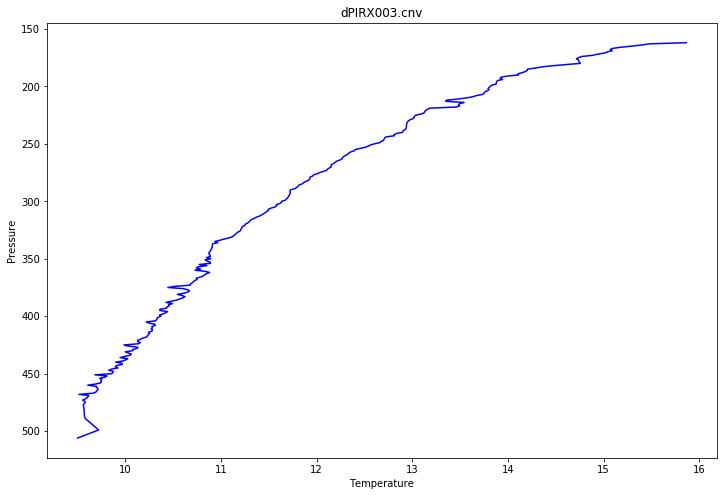

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(profile['TEMP'][idx], profile['PRES'][idx],'b')
plt.plot(profile['TEMP'][~idx], profile['PRES'][~idx],'ro')
plt.gca().invert_yaxis()
# plt.plot(profile['TEMP2'], profile['PRES'],'g')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title(profile.attributes['filename'])

Other pre defined quality control procedures are available, please check [CoTeDe's manual](https://cotede.readthedocs.io/en/latest/) to learn the details of the tests and what is available. For instance, to apply the EuroGOOS recommendations change the cfg argument

In [12]:
profile = fProfileQC('dPIRX003.cnv', cfg='eurogoos')
profile.flags['TEMP'].keys()

dict_keys(['valid_datetime', 'location_at_sea', 'global_range', 'gradient_depthconditional', 'spike_depthconditional', 'digit_roll_over', 'woa_normbias', 'overall'])

If not defined, the default configuration is a collection of tests resulted for our work on [IQuOD](http://www.iquod.org/), and is equivalent to define `cfg='cotede'`.

In [13]:
profile = fProfileQC('dPIRX003.cnv')
profile.flags['TEMP'].keys()

Deprecated cfg format. It should contain a threshold item.
Deprecated cfg format. It should contain a threshold item.


dict_keys(['valid_datetime', 'location_at_sea', 'global_range', 'profile_envelop', 'gradient', 'gradient_depthconditional', 'spike', 'spike_depthconditional', 'stuck_value', 'tukey53H_norm', 'digit_roll_over', 'woa_normbias', 'cars_normbias', 'rate_of_change', 'cum_rate_of_change', 'anomaly_detection', 'overall'])